In [1]:
import torch
import math
import matplotlib.pyplot as plt


# 데이터 생성
n_data = 1000
x = torch.linspace(-math.pi, math.pi, n_data)
x = torch.unsqueeze(x, dim=1)  # x를 (n_data, 1) 형태로 만듭니다

# y는 cos와 sin 함수를 섞어서 만듭니다
y = torch.cos(1 * x) + torch.sin(1 * x)

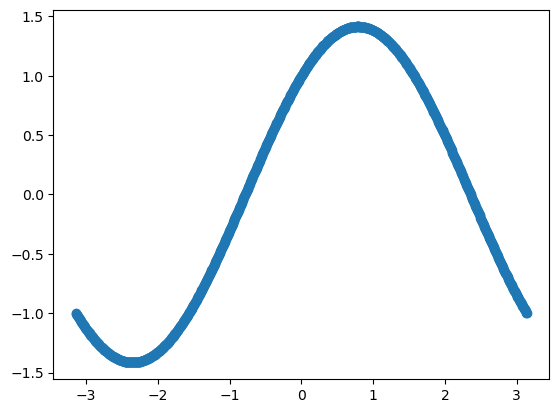

In [2]:
# show x and y
plt.scatter(x, y)

Input: tensor([-1.,  0.,  1.,  2., -2.])
Output: tensor([0., 0., 1., 2., 0.])


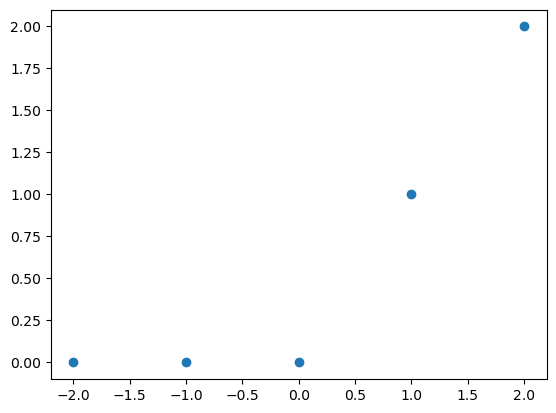

In [3]:
def relu(x):
    # -- CODE START --
    return x.clamp(min=0)
    # return None
    # -- CODE END --


# 임의의 입력 생성
reul_x = torch.tensor([-1.0, 0.0, 1.0, 2.0, -2.0])

# relu 함수 호출
reul_y = relu(reul_x)

# 결과 출력
print(f"Input: {reul_x}")
print(f"Output: {reul_y}")

# 그래프로 확인 x와 y 각각 확인
plt.scatter(reul_x, reul_y)

In [27]:
class MyMLP:
    def __init__(
        self, input_size: int = 1, hidden_size: list = [32, 16], output_size: int = 1
    ):

        # data generator
        g = torch.Generator().manual_seed(2147483647)

        # -- CODE START --

        self.layers = []

        for i, hidden in enumerate(hidden_size):
            if i == 0:
                # input layer
                self.layers.append(torch.randn(input_size, hidden, generator=g))
            else:
                # hidden layer
                self.layers.append(torch.randn(hidden_size[i - 1], hidden, generator=g))
        else:
            # output layer
            self.layers.append(torch.randn(hidden_size[-1], output_size, generator=g))
        print([layer.shape for layer in self.layers])
        # -- CODE END --

        # Turn on compute gradient
        for layer in self.layers:
            layer.requires_grad = True

    def forward(self, x):
        # -- CODE START --
        # input layer and hidden layer

        for layer in self.layers[:-1]:
            x = x @ layer
            x = relu(x)

        # output layer
        out = x @ self.layers[-1]

        # -- CODE END --

        return out

    def loss_fn(self, y, pred):

        # -- CODE START --
        loss = (y - pred).pow(2).sum()

        # -- CODE END --

        return loss

    def backward(self, loss, learning_rate):
        loss.backward()

        # -- CODE START --
        for param in self.layers:
            param.data = param.data - learning_rate * param.grad

            # gradient 초기화
            param.grad.zero_()

In [31]:
model = MyMLP(1, [32, 16, 8, 4], 1)


learning_rate = 1e-6
batch_size = 16  # 배치 사이즈 설정

# data shuffle
indices = torch.randperm(x.size(0))

# x와 y를 배치로 분할
# batch split
x = x[indices]
y = y[indices]
x_batches = torch.chunk(x, x.size(0) // batch_size)
y_batches = torch.chunk(y, y.size(0) // batch_size)


for t in range(10000):
    for b in range(len(x_batches)):
        # 순전파 단계: 예측값 y를 계산합니다
        y_pred = model.forward(x_batches[b])
        loss = model.loss_fn(y_batches[b], y_pred)
        # 손실(loss)을 계산하고 출력합니다
        model.backward(loss=loss, learning_rate=learning_rate)
        if t % 1000 == 999:
            print(t, b, loss.item())

[torch.Size([1, 32]), torch.Size([32, 16]), torch.Size([16, 8]), torch.Size([8, 4]), torch.Size([4, 1])]
999 0 10.235137939453125
999 1 9.17932415008545
999 2 5.290013313293457
999 3 10.173747062683105
999 4 7.31630802154541
999 5 8.673447608947754
999 6 12.570088386535645
999 7 11.338784217834473
999 8 11.277700424194336
999 9 12.287214279174805
999 10 11.487922668457031
999 11 13.967162132263184
999 12 12.881875038146973
999 13 4.937686443328857
999 14 13.44575309753418
999 15 8.613326072692871
999 16 10.256003379821777
999 17 8.63056755065918
999 18 6.88082218170166
999 19 12.79278564453125
999 20 9.302996635437012
999 21 7.190340518951416
999 22 7.2690324783325195
999 23 10.671436309814453
999 24 7.522027015686035
999 25 4.139604568481445
999 26 12.289466857910156
999 27 8.796427726745605
999 28 10.311482429504395
999 29 6.0948028564453125
999 30 12.34727954864502
999 31 12.363187789916992
999 32 12.472257614135742
999 33 9.039302825927734
999 34 10.517742156982422
999 35 13.108530

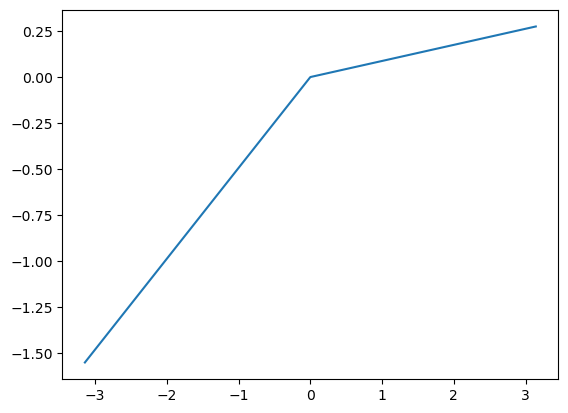

In [33]:
# test model
x_test = torch.linspace(-math.pi, math.pi, 1000)
x_test = torch.unsqueeze(x_test, dim=1)
y_test_pred = model.forward(x_test)
plt.plot(x_test, y_test_pred.detach(), label="predicted")

In [75]:
torch.__version__

'2.0.1'